<a href="https://colab.research.google.com/github/iizmyy/Analisis-Beban/blob/main/Analisis_Beban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

## Baca Data
Membaca data dari file csv

Dataset dapat diakses pada : https://github.com/iizmyy/Analisis-Beban.git

In [ ]:
df = pd.read_csv('data/data_latih_analisisbeban.csv')
df.head()

,id,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,avg,rasio_R,rasio_S,rasio_T,persen,Kondisi
0,1,227.96,229.12,212.66,5.02,5.65,5.12,1087.14,1229.80,1034.38,50.17,49.65,49.68,0.59,5.260000,0.953768,1.073464,0.972768,4.897615,Seimbang
1,2,225.60,211.36,230.37,5.67,5.43,5.11,1215.19,1090.30,1118.33,50.80,49.07,50.10,0.49,5.403333,1.049352,1.004935,0.945713,3.619165,Seimbang
2,3,215.55,228.78,224.95,9.33,9.56,9.48,1910.53,2077.78,2025.90,50.19,50.23,50.27,0.20,9.456667,0.986606,1.010927,1.002467,0.892962,Seimbang
3,4,217.76,221.96,213.59,8.66,9.69,8.14,1791.51,2043.25,1651.69,49.41,50.52,50.93,1.37,8.830000,0.980747,1.097395,0.921857,6.493016,Seimbang
4,5,233.13,220.22,213.45,4.20,3.78,3.75,930.19,790.81,760.42,49.72,50.60,50.45,0.44,3.910000,1.074169,0.966752,0.959079,4.944587,Seimbang


## Skenario I Analisis Kondisi Beban
### Menggunakan seluruh fitur pada dataset

Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.903125
Random Forest (Bagging) - Test :  0.925


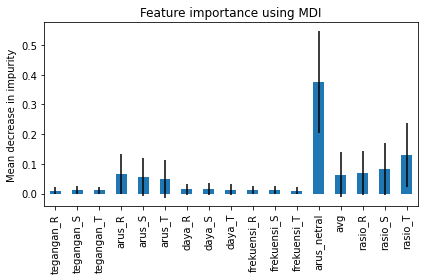

In [ ]:
# mengambil data latih dari dataset dan menghilangkan kolom id
data_latih = df.copy().drop(columns=['id'])
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:17].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:17]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
# filename = 'model/rf_analisisbeban_model_I.sav'
# pickle.dump(clf_RF, open(filename, 'wb'))

## Skenario II Analisis Kondisi Beban
### Fitur : tegangan_R, tegangan_S, tegangan_T, arus_R, arus_S, arus_T, daya_R, daya_S, daya_T, frekuensi_R, frekuensi_S, frekuensi_T, arus_netral

In [ ]:
# Data latih pemodelan
data_latih = df.loc[:,['tegangan_R', 'tegangan_S', 'tegangan_T', 'arus_R', 'arus_S',
                       'arus_T', 'daya_R', 'daya_S', 'daya_T', 'frekuensi_R', 'frekuensi_S', 'frekuensi_T',
                       'arus_netral', 'Kondisi']]
data_latih.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,Kondisi
0,227.96,229.12,212.66,5.02,5.65,5.12,1087.14,1229.80,1034.38,50.17,49.65,49.68,0.59,Seimbang
1,225.60,211.36,230.37,5.67,5.43,5.11,1215.19,1090.30,1118.33,50.80,49.07,50.10,0.49,Seimbang
2,215.55,228.78,224.95,9.33,9.56,9.48,1910.53,2077.78,2025.90,50.19,50.23,50.27,0.20,Seimbang
3,217.76,221.96,213.59,8.66,9.69,8.14,1791.51,2043.25,1651.69,49.41,50.52,50.93,1.37,Seimbang
4,233.13,220.22,213.45,4.20,3.78,3.75,930.19,790.81,760.42,49.72,50.60,50.45,0.44,Seimbang


Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.8968750000000001
Random Forest (Bagging) - Test :  0.9


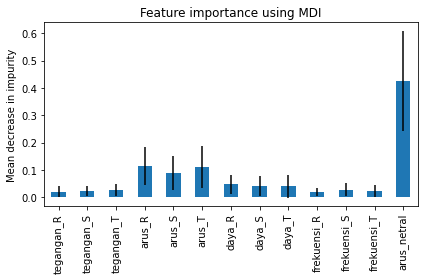

In [ ]:
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:13].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:13]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
#filename = 'model/rf_analisisbeban_model_II.sav'
#pickle.dump(clf_RF, open(filename, 'wb'))

## Skenario III Analisis Kondisi Beban
### Fitur : arus_R, arus_S, arus_T, arus_netral, avg, rasio_R, rasio_S, rasio_T

In [ ]:
# Data latih pemodelan
data_latih = df.loc[:,['arus_R', 'arus_S', 'arus_T', 'arus_netral', 'avg', 'rasio_R', 'rasio_S',
                       'rasio_T', 'Kondisi']]
data_latih.head()

,arus_R,arus_S,arus_T,arus_netral,avg,rasio_R,rasio_S,rasio_T,Kondisi
0,5.02,5.65,5.12,0.59,5.260000,0.953768,1.073464,0.972768,Seimbang
1,5.67,5.43,5.11,0.49,5.403333,1.049352,1.004935,0.945713,Seimbang
2,9.33,9.56,9.48,0.20,9.456667,0.986606,1.010927,1.002467,Seimbang
3,8.66,9.69,8.14,1.37,8.830000,0.980747,1.097395,0.921857,Seimbang
4,4.20,3.78,3.75,0.44,3.910000,1.074169,0.966752,0.959079,Seimbang


Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.90625
Random Forest (Bagging) - Test :  0.925


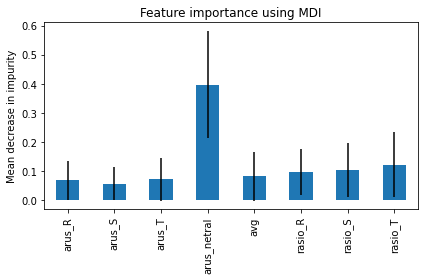

In [ ]:
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:8].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:8]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
# filename = 'model/rf_analisisbeban_model_III.sav'
# pickle.dump(clf_RF, open(filename, 'wb'))

## Skenario IV Analisis Kondisi Beban
### Fitur : arus_R, arus_S, arus_T, avg

In [ ]:
# Data latih pemodelan
data_latih = df.loc[:,['arus_R', 'arus_S', 'arus_T', 'avg', 'Kondisi']]
data_latih.head()

,arus_R,arus_S,arus_T,avg,Kondisi
0,5.02,5.65,5.12,5.260000,Seimbang
1,5.67,5.43,5.11,5.403333,Seimbang
2,9.33,9.56,9.48,9.456667,Seimbang
3,8.66,9.69,8.14,8.830000,Seimbang
4,4.20,3.78,3.75,3.910000,Seimbang


Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.778125
Random Forest (Bagging) - Test :  0.8125


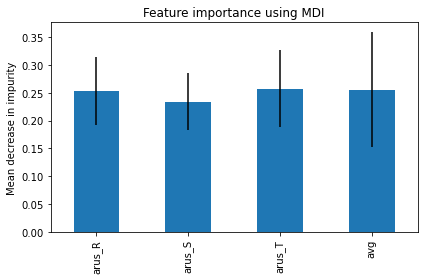

In [ ]:
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:4].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:4]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
# filename = 'model/rf_analisisbeban_model_IV.sav'
# pickle.dump(clf_RF, open(filename, 'wb'))

## Skenario V Analisis Kondisi Beban
### Fitur : arus_R, arus_S, arus_T, persen

In [ ]:
data_latih = df.loc[:,['arus_R', 'arus_S', 'arus_T', 'persen', 'Kondisi']]
data_latih.head()

,arus_R,arus_S,arus_T,persen,Kondisi
0,5.02,5.65,5.12,4.897615,Seimbang
1,5.67,5.43,5.11,3.619165,Seimbang
2,9.33,9.56,9.48,0.892962,Seimbang
3,8.66,9.69,8.14,6.493016,Seimbang
4,4.20,3.78,3.75,4.944587,Seimbang


Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.9906250000000001
Random Forest (Bagging) - Test :  1.0


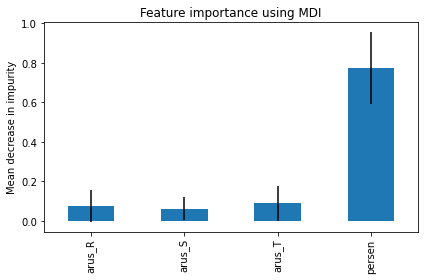

In [ ]:
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:4].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:4]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
#filename = 'model/rf_analisisbeban_model_V.sav'
#pickle.dump(clf_RF, open(filename, 'wb'))

## Prediksi kondisi beban menggunakan data dari sensor

In [ ]:
df_sensor = pd.read_csv('data/db_sensor_uji_analisisbeban.csv')
df_sensor.head()

,id,arus_R,arus_S,arus_T,tegangan_R,tegangan_S,tegangan_T,daya_R,daya_S,daya_T,...,arus_netral,beban_1,beban_2,beban_3,beban_4,beban_5,beban_6,beban_7,beban_8,timestamp
0,1,0.12,0.12,0.0,229.9,230.0,229.8,6.7,6.5,0.0,...,0.21,0.0,0.2,0.44,0.20,0.2,0.2,0.21,1.24,2025-07-06 16:21:50
1,2,0.12,0.12,0.0,229.8,229.9,229.7,6.7,6.6,0.0,...,0.20,0.0,0.0,0.40,0.21,0.0,0.2,0.21,1.19,2025-07-06 16:21:54
2,3,0.12,0.12,0.0,229.8,229.9,229.7,6.6,6.5,0.0,...,0.20,0.0,0.0,0.41,0.00,0.0,0.2,0.20,1.18,2025-07-06 16:21:58
3,4,0.12,0.12,0.0,230.0,230.1,229.9,6.7,6.5,0.0,...,0.20,0.0,0.2,0.36,0.00,0.0,0.2,0.21,1.20,2025-07-06 16:22:02
4,5,0.12,0.12,0.0,229.9,230.0,229.8,6.7,6.5,0.0,...,0.20,0.0,0.0,0.36,0.00,0.0,0.2,0.21,1.16,2025-07-06 16:22:07


In [ ]:
# Menghitung avg, rasio_R, rasio_S, rasio_T dari data sensor dan memasukkan ke dalam data uji
data_uji = df_sensor.loc[:,['tegangan_R', 'tegangan_S', 'tegangan_T', 'arus_R', 'arus_S',
                                    'arus_T', 'daya_R', 'daya_S', 'daya_T', 'frekuensi_R', 'frekuensi_S', 'frekuensi_T',
                                    'arus_netral']]
data_uji['avg'] = data_uji[['arus_R', 'arus_S', 'arus_T']].mean(axis=1)
data_uji['rasio_R'] = data_uji['arus_R'] / data_uji['avg']
data_uji['rasio_S'] = data_uji['arus_S'] / data_uji['avg']
data_uji['rasio_T'] = data_uji['arus_T'] / data_uji['avg']
persen = (((data_uji['rasio_R']-1).abs() + (data_uji['rasio_S']-1).abs() + (data_uji['rasio_T']-1).abs())/3)*100 # menghitung persentasi rasio R, S dan T
data_uji.insert(17, 'persen', persen)

data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,avg,rasio_R,rasio_S,rasio_T,persen
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,1.5,1.5,0.0,66.666667
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,1.5,1.5,0.0,66.666667
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,1.5,1.5,0.0,66.666667
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667


In [ ]:
# Prediksi menggunakan model I

# load model I
filename = 'model/rf_analisisbeban_model_I.sav'
load_model_I = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.iloc[0:123,0:17].values
y_pred = load_model_I.predict(X_test)
data_uji.loc[0:122, ['Kondisi']] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,avg,rasio_R,rasio_S,rasio_T,persen,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang


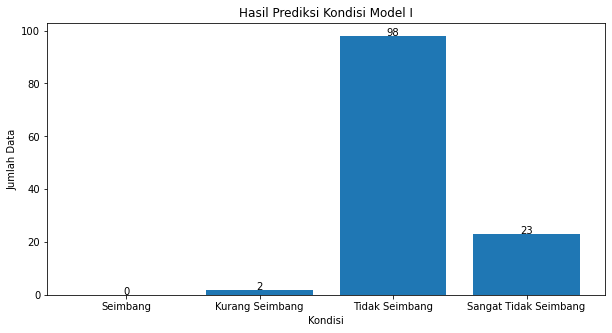

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model I")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()

In [ ]:
# Prediksi menggunakan model II

# load model II
filename = 'model/rf_analisisbeban_model_II.sav'
load_model_II = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.loc[:,['tegangan_R', 'tegangan_S', 'tegangan_T', 'arus_R', 'arus_S',
                       'arus_T', 'daya_R', 'daya_S', 'daya_T', 'frekuensi_R', 'frekuensi_S', 'frekuensi_T',
                       'arus_netral']].values
y_pred = load_model_II.predict(X_test)
data_uji['Kondisi'] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,avg,rasio_R,rasio_S,rasio_T,persen,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang


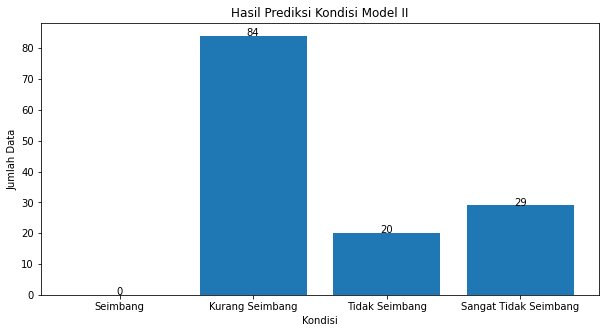

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model II")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()

In [ ]:
# Prediksi menggunakan model III

# load model III
filename = 'model/rf_analisisbeban_model_III.sav'
load_model_III = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.loc[0:123,['arus_R', 'arus_S', 'arus_T', 'arus_netral', 'avg', 'rasio_R', 'rasio_S', 'rasio_T']].values
y_pred = load_model_III.predict(X_test)
data_uji.loc[0:123, ['Kondisi']] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,avg,rasio_R,rasio_S,rasio_T,persen,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Tidak Seimbang


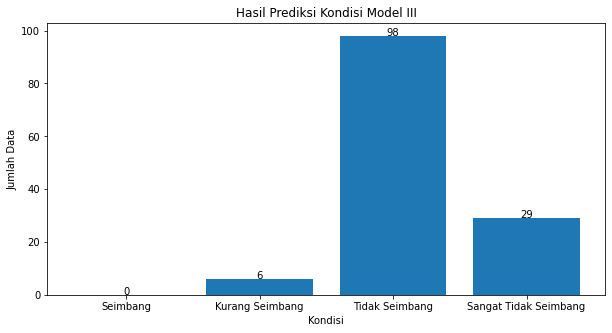

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model III")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()

In [ ]:
# Prediksi menggunakan model IV

# load model IV
filename = 'model/rf_analisisbeban_model_IV.sav'
load_model_IV = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.loc[:,['arus_R', 'arus_S', 'arus_T', 'avg']].values
y_pred = load_model_IV.predict(X_test)
data_uji['Kondisi'] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,avg,rasio_R,rasio_S,rasio_T,persen,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,1.5,1.5,0.0,66.666667,Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Seimbang


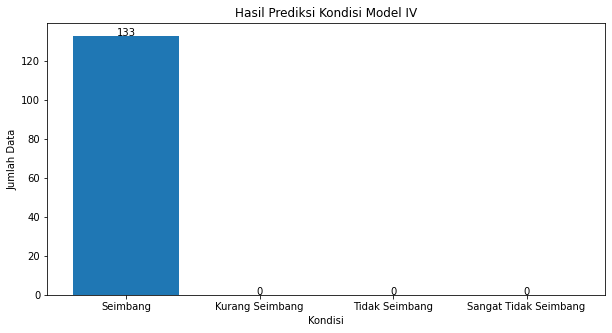

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model IV")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()

In [ ]:
# Prediksi menggunakan model V

# load model V
filename = 'model/rf_analisisbeban_model_IV.sav'
load_model_IV = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.loc[0:123,['arus_R', 'arus_S', 'arus_T', 'persen']].values
y_pred = load_model_IV.predict(X_test)
data_uji.loc[0:123, ['Kondisi']] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,avg,rasio_R,rasio_S,rasio_T,persen,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,1.5,1.5,0.0,66.666667,Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,1.5,1.5,0.0,66.666667,Seimbang


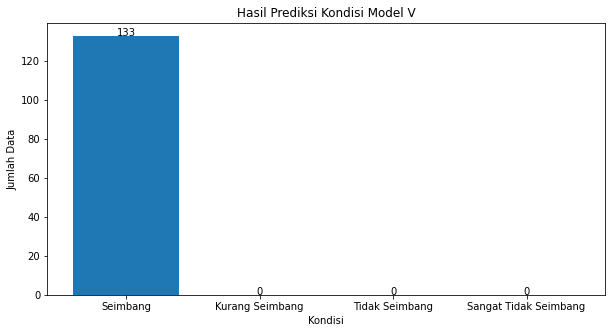

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model V")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()